<center>
<h1>
<h1><b>Logistic Regression for Marketing Campaign</b></h1>
</h1>

<h2>The Debugging Dragons<h2>

<h2><b>ISM4641:</b> Python for Business Analytics</h2>

<h3><b>Presented by:</b> David Layne, Jenna Bellagamba, S M Siddiqur Rahman Likhon, and Rashi Ratan</h3>

<h4>04/21/2025</h4>

</center>

---

##Introduction

###Business Problem:
A large retail company that operates across a variety of products - food, grocery items, beverages, household items and much more - seeks to optimize and enhance its marketing efforts by improving marketing effectiveness and customer targeting.

To support this goal, the organization is providing a comprehensive dataset that provides information on customer demographics like age, marital status, education, income, purchase behavior in terms of amount spent by category, frequency, and recency and marketing interactions through number of contacts and responses to marketing campaigns.

The dataset helps to understand customer behavior, segment customers for better targeting, increase retention and overall revenue, and gauge the efficiency and effectiveness of marketing campaigns.

As part of this business objective, the company requires a predictive solution that can anticipate customer responses (Accepted (1) /Declined (0)) for future marketing campaigns. This **classification** will enable more targeted outreach, better allocation of marketing resources, and higher conversion rates.





---


##Data Description
We used a [Marketing Campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data) dataset found on Kaggle.com which is linked here. For the purposes of this report, be sure to download the xlsx file and attach it to this notebook before proceeding,

The marketing campaign dataset presents complete customer profiles showing their relationship to promotional offers while trying to determine which customers will accept promotional offers. The columns include:

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase
- Z_CostContact - Cost to contact a customer
- Z_Revenue - Revenue after client accepting campaign


The target variable (y) will be the Response column, which shows whether customers accepted promotional offers in their recent campaign with a 0 or 1 value. When defining features (X), we chose to leave out the Education and Marital_Status columns because they were unable to be converted to the correct datatype. Future marketing campaign responses can be predicted using this complete set of demographic attributes with behavioral patterns and campaign data features.




####Initialize Data and libraries

In [ ]:
#import libraries and functions
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

'''
User must add the excel file to the colab notebook
before proceeding
'''

#import dataset
market_camp = pd.read_excel('marketing_campaign.xlsx')

###Exploratory Data Analysis (EDA)

- Dataframe Head
- Data Description
- Target and Features Declaration
- Null value handling
- Variance and Correlation Visuals


####Convert to DataFrame

In [ ]:
#create dataframe
df = pd.DataFrame(market_camp)

#show first five rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


####Handling Null Values

In [ ]:
#Null values in all columns
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
#Drops rows with any missing values
nd = df.dropna(axis=0, how='any')

#prints the old dataframe length vs the new length
print("Old data frame length:", len(df))
print("New data frame length:", len(nd))
print("Rows with at least one NaN value:", (len(df) - len(nd)))

Old data frame length: 2240
New data frame length: 2216
Rows with at least one NaN value: 24


####Declare Features and Target

In [ ]:
#Define features (X) and target (y)
X_resp = nd[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
             'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
             'AcceptedCmp5', 'Complain', 'Z_CostContact', 'Z_Revenue']]

y_resp = nd['Response']

#Describe Data (Summary Statistics)
print('X Described:',X_resp.describe())
print('Y Described:',y_resp.describe())

X Described:         Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntFishProducts  MntSweetProducts  \
count  2216.000000  2216.000000      2216.000000       2216.000000   
mean    305.091606    26.356047        37.637635         27.028881   
std     337.327920    39.793917        54.752082         41.072046   
min       0.000000    

####Variance Visualization

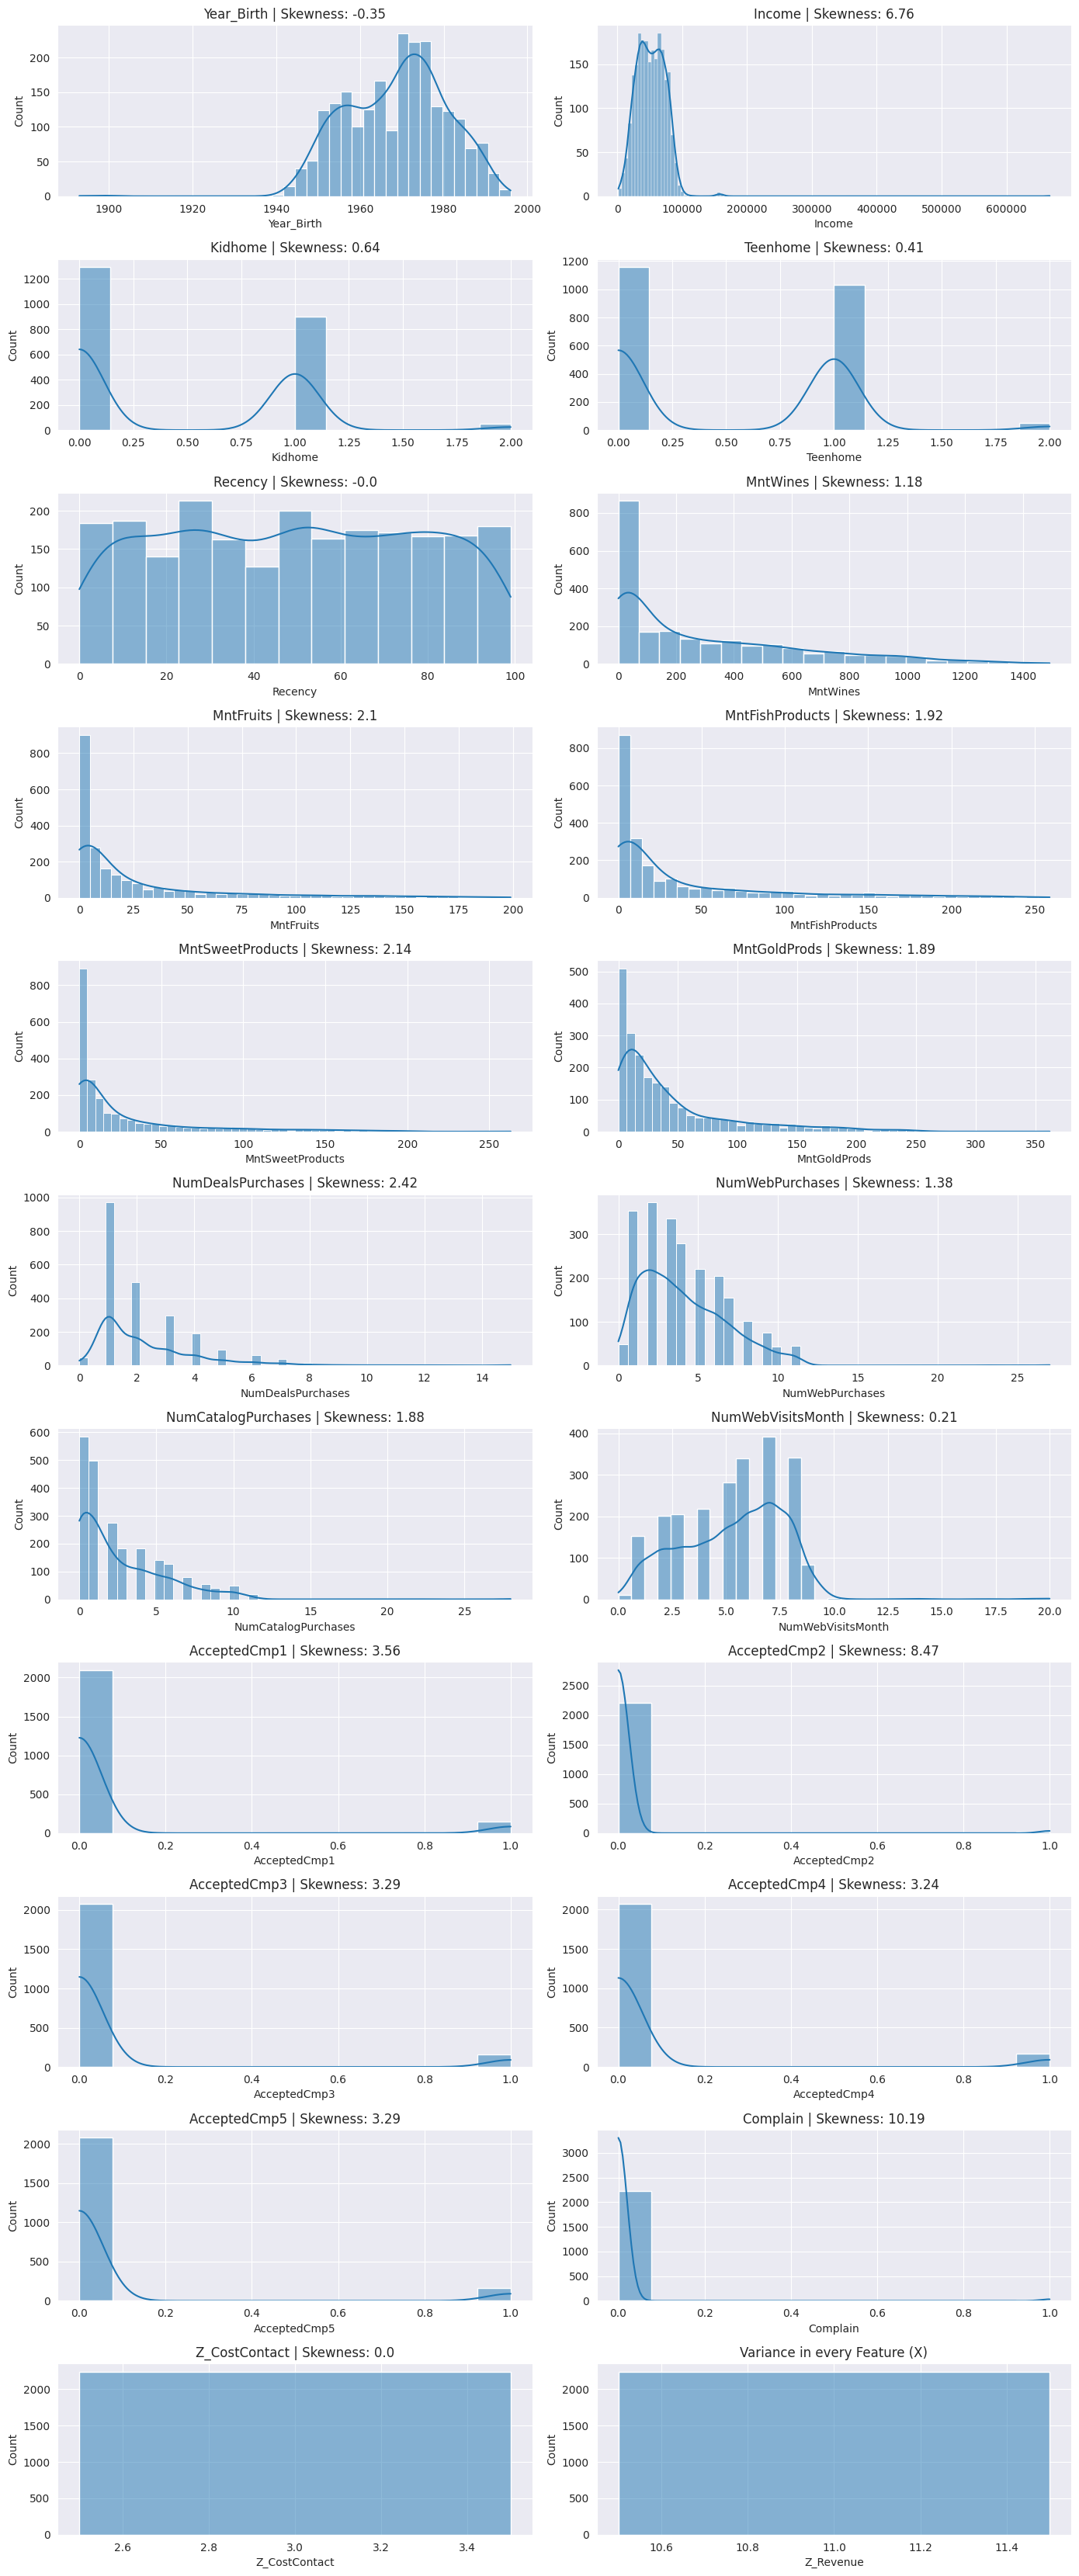

In [ ]:
#Visual that helps us understand the variance across each feature (X)
sns.set_style("darkgrid")

feature_columns = X_resp.columns

plt.figure(figsize=(14, len(feature_columns) * 3))
for idx, feature in enumerate(feature_columns, 1):
    plt.subplot(len(feature_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.title('Variance in every Feature (X)')
plt.tight_layout()
plt.show()

####Correlation Visualization

Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.



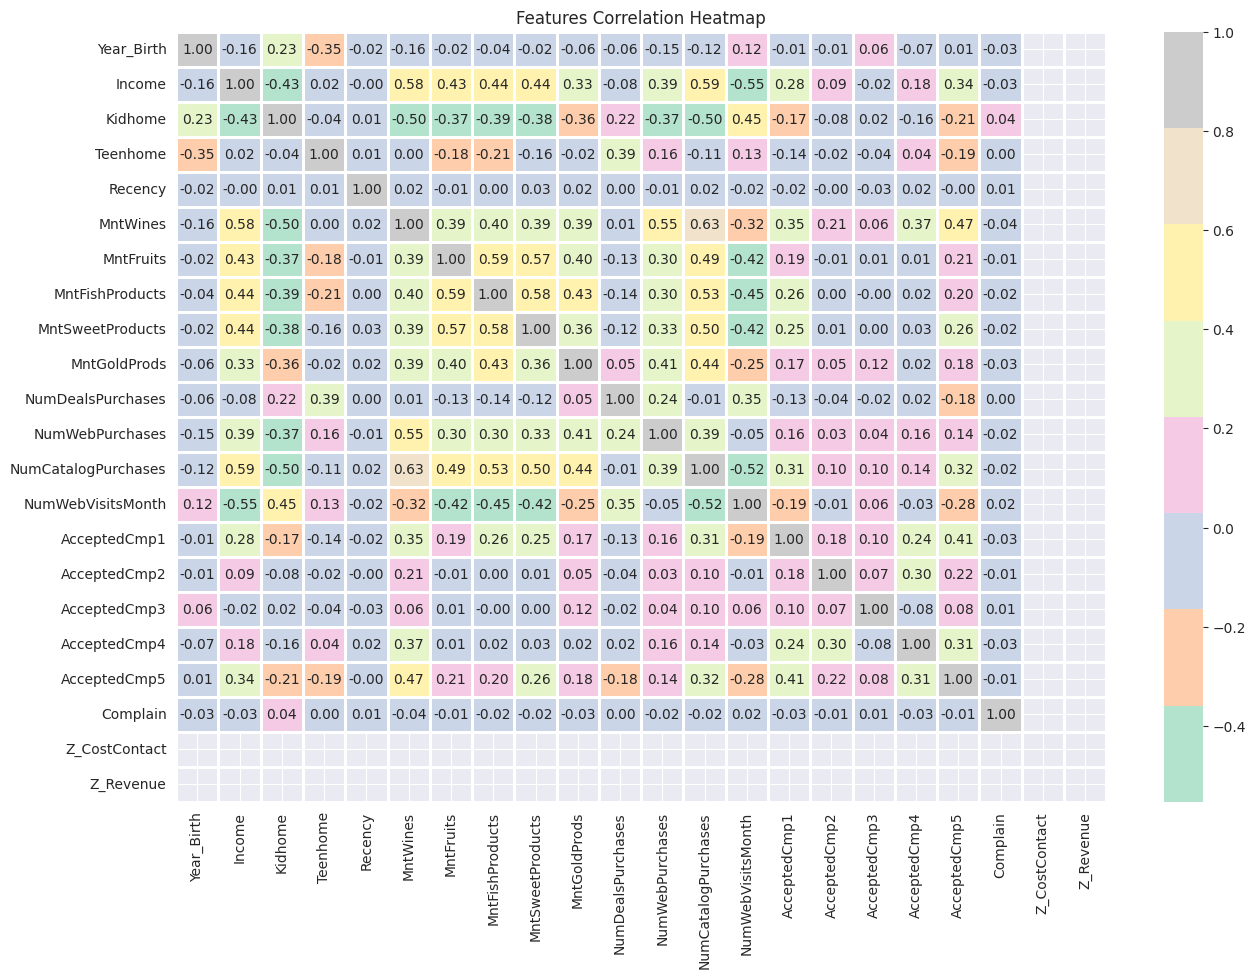

In [ ]:
#Correlation matric for each feature
print('Values close to +1 indicates strong positive correlation, -1 indicates a strong negative correlation and 0 indicates suggests no linear correlation.\n')

plt.figure(figsize=(15, 10))

sns.heatmap(X_resp.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Features Correlation Heatmap')
plt.show()



---


##Data Modeling

- The Logistic Regression is made to predict the probability of a response from customers for a Marketing Campaign. This is based on previous responses made by customers along with their customer profiles. We chose to do a 70/30 train-test split as to avoid overfitting.

####Train-Test Split

In [ ]:
#Train-Test Split
X_resp_train, X_resp_test, y_resp_train, y_resp_test = train_test_split(
    X_resp, y_resp,
    test_size=0.20,
    random_state=42,
    stratify=y_resp
    ) #Used a 80/20 train-test split

#Print the shapes of the resulting arrays
print(f"X Train set size: {X_resp_train.shape[0]}, X Test set size: {X_resp_test.shape[0]}")
print(f"Y Train set size: {y_resp_train.shape[0]}, Y Test set size: {y_resp_test.shape[0]}")

X Train set size: 1772, X Test set size: 444
Y Train set size: 1772, Y Test set size: 444


####Model Training and Scaling

In [ ]:
#Initialize Logistic Regression
'''
Here, we had to import the make_pipeline function along with StandardScaler()
in order to avoid a max_iter and lgdf errors respectively.
'''

#create scaler
scaler = StandardScaler()

#scale features for test and train sets
X_resp_train_scaled = scaler.fit_transform(X_resp_train)
X_resp_test_scaled = scaler.transform(X_resp_test)


log_reg_resp = LogisticRegression()

#fit the data
log_reg_resp.fit(X_resp_train_scaled, y_resp_train)

print('Logistic Regression Model for Marketing Campaign data Trained')

Logistic Regression Model for Marketing Campaign data Trained




---


##Results and Evaluation


####Make Predictions

In [ ]:
#make predicitons
y_pred = log_reg_resp.predict(X_resp_test_scaled)

#predict actual probabilities
y_pred_proba = log_reg_resp.predict_proba(X_resp_test_scaled)

print('Making Predictions on the Test Set')

print('\n----First 10 Predictions-----')
print(y_pred[:10])

print('\n----First 10 Predicted Probabilities-----')
print(y_pred_proba[:10])



Making Predictions on the Test Set

----First 10 Predictions-----
[0 0 0 0 0 0 0 0 0 0]

----First 10 Predicted Probabilities-----
[[0.92706288 0.07293712]
 [0.98756225 0.01243775]
 [0.9737739  0.0262261 ]
 [0.8279683  0.1720317 ]
 [0.84908962 0.15091038]
 [0.95307577 0.04692423]
 [0.83190438 0.16809562]
 [0.98881923 0.01118077]
 [0.95672371 0.04327629]
 [0.9550698  0.0449302 ]]


####Accuracy

In [ ]:
#calculate accuracy score
accuracy = accuracy_score(y_resp_test, y_pred)

#print results and interpretation
print(f"Model Accuracy on Test Set: {accuracy:.4f}\n")
print(f"Interpretation: The model correctly classified {accuracy:.2%} of the customer responses in the test set.")
print("This indicates a very high overall performance in distinguishing an Acceptance over a Declination for the last marketing campaign.")

Model Accuracy on Test Set: 0.8761

Interpretation: The model correctly classified 87.61% of the customer responses in the test set.
This indicates a very high overall performance in distinguishing an Acceptance over a Declination for the last marketing campaign.


####Precision

In [ ]:
#calculate precision score
precision = precision_score(y_resp_test, y_pred, zero_division=0) #default is for Response 1 (Accepted)

#print results and interpretation
print(f"Model Precision on Test Set: {precision:.4f}\n")
print(f"Interpretation: When the model predicts an accepted response (Response=1), it is correct {precision:.2%} of the time.")
print("High precision is important if the cost of incorrectly flagging a customer response as accepted (FP) is high.")

Model Precision on Test Set: 0.7308

Interpretation: When the model predicts an accepted response (Response=1), it is correct 73.08% of the time.
High precision is important if the cost of incorrectly flagging a customer response as accepted (FP) is high.


####Recall

In [ ]:
#calculate recall score
recall = recall_score(y_resp_test, y_pred, zero_division=0) #default is for Response 1 (Accepted)

#print results and interpretation
print(f"Model Recall on Test Set: {recall:.4f}\n")
print(f"Interpretation: The model identified {recall:.2%} of all the truly accepted responses present in the test set.")
print("High recall is crucial if the cost of missing a declination (FN) is very high.")
print('\nThis model has a low recall score, leading to declinations being wrongfully shown as accepted(FN)')

Model Recall on Test Set: 0.2836

Interpretation: The model identified 28.36% of all the truly accepted responses present in the test set.
High recall is crucial if the cost of missing a declination (FN) is very high.

This model has a low recall score, leading to declinations being wrongfully shown as accepted(FN)


####F1-Score

In [ ]:
#calculate F1-Score
f1 = f1_score(y_resp_test, y_pred, zero_division=0)

#print results and Interpretation
print(f"Model F1-Score on Test Set: {f1:.4f}\n")
print(f"Interpretation: The F1-Score of {f1:.4f} is low. The model is flawed in finding actual customer acceptances (TP)")

Model F1-Score on Test Set: 0.4086

Interpretation: The F1-Score of 0.4086 is low. The model is flawed in finding actual customer acceptances (TP)


####Confusion Matrix

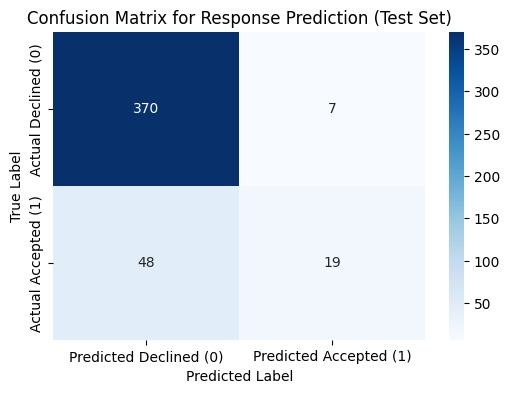


--- Confusion Matrix Components (Response Model) ---
True Negatives (TN): 370 (Correctly predicted 'Declined')
False Positives (FP): 7 (Incorrectly predicted 'Accepted')
False Negatives (FN): 48 (Incorrectly predicted 'Declined')
True Positives (TP): 19 (Correctly predicted 'Accepted')


In [ ]:
#create confusion matrix
cm_resp = confusion_matrix(y_resp_test, y_pred)

#for better visualization, let's use seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_resp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Declined (0)', 'Predicted Accepted (1)'],
            yticklabels=['Actual Declined (0)', 'Actual Accepted (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Response Prediction (Test Set)')
plt.show()

#extract values (for clarity)
tn_resp, fp_resp, fn_resp, tp_resp = cm_resp.ravel()
print("\n--- Confusion Matrix Components (Response Model) ---")
print(f"True Negatives (TN): {tn_resp} (Correctly predicted 'Declined')")
print(f"False Positives (FP): {fp_resp} (Incorrectly predicted 'Accepted')")
print(f"False Negatives (FN): {fn_resp} (Incorrectly predicted 'Declined')")
print(f"True Positives (TP): {tp_resp} (Correctly predicted 'Accepted')")

####Classification Report

In [ ]:
#crete classification report
cr = classification_report(y_resp_test, y_pred, target_names=['Declined Response (0)', 'Accepted Response (1)'], zero_division=0)

#print report
print("--- Classification Report (Comprehensive Summary - Marketing Campaign Response Model) ---")
print(cr)

--- Classification Report (Comprehensive Summary - Marketing Campaign Response Model) ---
                       precision    recall  f1-score   support

Declined Response (0)       0.89      0.98      0.93       377
Accepted Response (1)       0.73      0.28      0.41        67

             accuracy                           0.88       444
            macro avg       0.81      0.63      0.67       444
         weighted avg       0.86      0.88      0.85       444



###**Important Metrics**

#### Accuracy Score:
A very important metric for our model is its accuracy score. The accuracy score measures the proportion of predictions that were corrcetly predicted by the model. For our model, this number stands at 87.61%, indicating that out of a 100, 87 predictions made by this model were correct. This is an important metric for the business to assess the overall success/failure of a marketing campaign based on the predictions made by the model. It helps the business determine the extent to which they can safely rely on the predictions by this model and therefore, make strategic decisions regarding their marketing campaign.


####Precision Score:
The other most important metric in this model is the Precision score. This measures the accuracy of all the positive predictions. It determines the proportiong of all positive predictions made by the model that were *actually positive*. Of all the times that the model predicted that the customer would accept the offer in the recent campaign, 73.08% of the positives were actually true.

- The Precision vs Recall Trade-Off:
  Why is the precision more important for our model as compared to the recall metric?

  Precision is a metric that is typically more important when the cost false positives are high. On the other hand, recall is more important in situations where false negatives cost the business more.
  In this model, the prediction is made regarding the response received by a marketing campaing.

  If the model focuses more on recall, it tries to identify as many actual responders as possible — even if it means predicting that some customers responded when they didn't. In this context, that could lead to overestimating the campaign's effectiveness, since the model might label non-responders as responders. This can mislead the business into thinking the campaign was more successful than it actually was.

  However, when the model emphasizes precision more, it tries to reduce the number of false positives. Here, this would mean that it wants to have fewer instances of having predicted a positive response to the campaign which in fact was negative. This means the model attemps to minimize an inflated prediction of the campaign.

The emphasis on Precision aligns with a more conservative approach, typically recommended for business considering the spending for such campaigns. Therefore, for this model, we consider Precision a more important metric as compared to Recall.

####Coefficients

In [ ]:
#calculate coefficients for each feature
coefficients = log_reg_resp.coef_[0]

#created a pandas Series for easier viewing, mapping coefficients to feature names.
coef_series = pd.Series(coefficients, index=X_resp.columns)

#calculate intercept
log_intercept = log_reg_resp.intercept_[0]
print(f"Intercept (β₀ - Log-Odds when X=0): {log_intercept:.4f}")

#printing for significant coefficients
print("\n----Model Coefficients (Log-Odds):----")
print(f"AcceptedCmp3: {coef_series.loc['AcceptedCmp3']:.2f}")
print(f"NumWebVisitsMonth: {coef_series.loc['NumWebVisitsMonth']:.2f}")
print(f"AcceptedCmp5: {coef_series.loc['AcceptedCmp5']:.2f}")
print(f"Teenhome: {coef_series.loc['Teenhome']:.2f}")
print(f"Recency: {coef_series.loc['Recency']:.2f}")

#calculating odds ratios for better interpretation
coefficients_odd_ratios = np.exp(coef_series)
print("\n----Odds-Ratios:----")
print(f"AcceptedCmp3: {coefficients_odd_ratios.loc['AcceptedCmp3']:.2f}")
print(f"NumWebVisitsMonth: {coefficients_odd_ratios.loc['NumWebVisitsMonth']:.2f}")
print(f"AcceptedCmp5: {coefficients_odd_ratios.loc['AcceptedCmp5']:.2f}")
print(f"Teenhome: {coefficients_odd_ratios.loc['Teenhome']:.2f}")
print(f"Recency: {coefficients_odd_ratios.loc['Recency']:.2f}")

Intercept (β₀ - Log-Odds when X=0): -2.3652

----Model Coefficients (Log-Odds):----
AcceptedCmp3: 0.49
NumWebVisitsMonth: 0.44
AcceptedCmp5: 0.39
Teenhome: -0.61
Recency: -0.74

----Odds-Ratios:----
AcceptedCmp3: 1.63
NumWebVisitsMonth: 1.55
AcceptedCmp5: 1.47
Teenhome: 0.55
Recency: 0.48


For this section, we have picked the top five most significant coefficients for this model:

1. The most significant coefficient for this model is for the feature "AcceptedCmp3" which refers to the acceptance of the offer in marketing campaign 3 by the customer. An odds-ratio of 1.63 indicates that with each additional acceptance in the campaign, the odds of the customer accepting offers for the recent campaign increase by 63%, holding all other features constant.
2. The feature "NumWebVisitsMonth" refers to the number of times the company's website was visited by the customer during the month. An odds-ration of 1.55 for this feature indicates that the odds of a customer accepting the most recent campaign increase by 55% with each additional visit to the website, holding all other features constant.
3. "AcceptedCmp5" is a feature that also significantly influences the odds of the outcome. It refers to the acceptance of the offer in marketing campaign 5 by the customer. Here, with an odds-ratio of 1.46, it is clear that with each additional acceptance in the marketing campaign 5, the odds of the customer accepting the offer for the recent campaign increase by 47%, holding all other features constant.
4. The "teenhome" feature in this model indicates the number of teenagers present in the household. An odds-ratio of 0.55 in this model for this feature indicates that with additional teenager in a household, the odds of the customer accepting the most recent campaign goes down by 45%, holding all other features constant.
5. Recency is the feature denoting the number of days since the last purchase made by the customer. According to the results, where the odds-ratio for the feature in this model is 0.48, we interpret that with each additional day since the last purchase made by the customer, the odds of the customer accepting the recent campaign decrease by 52%, holding all other features constant.




##Summary and Conclusion
The overall Logistic Regression model serves to predict a customers response (Accepted 0, Declined 1) to a Marketing Campaign. This Response column was designated as the target (y) in the model. The features (X) were taken from many other relevant columns in the dataset aside from two, Marital_Status and Education as these were unable to be converted to a float datatype. Once we narrowed the target and features, we were able to declare the model and designate a train-test (80/20) split from the training set to the testing set. After making predictions and evaluating important metrics, the model has absolute practical business applications.

Due to the high Accuracy score,the business can assess the overall success/failure of a marketing campaign. It helps the business determine the extent to which they can rely on the predictions by this model, allowing them to make strategic decisions regarding the next marketing campaign.

The high Precision Score, there is an emphasis for a more conservative approach, typically recommended for a business considering the spending for new campaigns. By focusing on this score, the model can reduce the number of falsly accepted customer responses (FP), allowing more money to be saved.

##Business Implications & Recommendations:​
The model excels in an overall rating of the marketing campaign however, able to predict falsly accepted responses which can avoid an overestimate of resources, allowing the business to keep more stock. This lines up the business for a more conservative approach, giving them more factors to consider before spending on the new campaign.

The model is inherently flawed however, with an inability to maximize campaign reach and conversations due to the missed potential acceptors. Instead, there should be a priority for improving the Recall score for an Actual Accepted Response through further analysis and investigation.